In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

In [2]:
data = pd.read_csv("C:/temp/destinations_LP_crawler_Ex5 .csv",encoding='latin-1')


In [3]:
type(data)


pandas.core.frame.DataFrame

In [4]:
data['city']

0       Antalya
1        Athens
2     Ayia-napa
3       Bangkok
4     Barcelona
        ...    
71       Venice
72       Vienna
73       Warsaw
74    Zakynthos
75       Zurich
Name: city, Length: 76, dtype: object

In [5]:
api_key = MYKPIdef GETNAME(row):
    city=row['city']
    try:
            urlgeocode="https://maps.googleapis.com/maps/api/geocode/json?address=%s&key=%s" % (city,api_key)
            response_urlgeocode = requests.get(urlgeocode)
            response_data_geocode = response_urlgeocode.json()
            cuntrydic=response_data_geocode['results'][0]['address_components']
            for i in cuntrydic:
                if [i][0]['types'][0]=='country':
                    return([i][0]['long_name'])
                                
    except:
            try:
                city=city.split('-')[0]
                urlgeocode="https://maps.googleapis.com/maps/api/geocode/json?address=%s&key=%s" % (city,api_key)
                response_urlgeocode = requests.get(urlgeocode)
                response_data_geocode = response_urlgeocode.json()
                cuntrydic=response_data_geocode['results'][0]['address_components']
                for i in cuntrydic:
                       if [i][0]['types'][0]=='country':
                             return([i][0]['long_name'])
            except:
                    try:
                        city=row['city_LP']
                        urlgeocode="https://maps.googleapis.com/maps/api/geocode/json?address=%s&key=%s" % (city,api_key)
                        response_urlgeocode = requests.get(urlgeocode)
                        response_data_geocode = response_urlgeocode.json()
                        cuntrydic=response_data_geocode['results'][0]['address_components']
                        for i in cuntrydic:
                            if [i][0]['types'][0]=='country':
                                return([i][0]['long_name'])
                    except:   
                        return np.NaN

data['Country']=data.apply(lambda row:GETNAME(row),axis=1)

In [6]:
data['Country'].unique()


array(['Turkey', 'Greece', 'Cyprus', 'Thailand', 'Spain', 'Switzerland',
       'Georgia', 'China', 'Germany', 'United States', 'Slovakia',
       'Belgium', 'Romania', 'Hungary', 'Bulgaria', 'Mexico', 'Italy',
       'Poland', 'India', 'Ireland', 'Croatia', 'Austria', 'Ukraine',
       'Portugal', 'Slovenia', 'Philippines', 'France', 'Russia',
       'Taiwan', 'Canada'], dtype=object)

In [7]:
data

,city,city_LP,Country
0,Antalya,mediterranean-coast/antalya,Turkey
1,Athens,Athens,Greece
2,Ayia-napa,the-republic-of-cyprus/Agia-napa,Cyprus
3,Bangkok,Bangkok,Thailand
4,Barcelona,Barcelona,Spain
...,...,...,...
71,Venice,Venice,Italy
72,Vienna,Vienna,Austria
73,Warsaw,Warsaw,Poland
74,Zakynthos,Zakynthos,Greece


In [8]:
#we have none?
data[data['Country'].isnull()]

#data[data['Country']=='Poland']

,city,city_LP,Country


In [9]:
#data1=data[data['city']=='Venice']
data1=data.iloc[1:10]

In [10]:
data1

,city,city_LP,Country
1,Athens,Athens,Greece
2,Ayia-napa,the-republic-of-cyprus/Agia-napa,Cyprus
3,Bangkok,Bangkok,Thailand
4,Barcelona,Barcelona,Spain
5,Basel,northern-switzerland/basel,Switzerland
6,Batumi,adjara/batumi,Georgia
7,Beijing,Beijing,China
8,Berlin,Berlin,Germany
9,Boston,Boston,United States


In [11]:
def GetDescription(row):
    try:
        url="https://www.lonelyplanet.com/"+row['Country']+"/"+row['city_LP']
        html = requests.get(url)
        soup = BeautifulSoup(html.content,'html.parser')
        diteils_list=list()
        diteils=soup.find('div',class_='readMore_content___5EuR relative overflow-hidden max-h-96 is-max wysiwyg')
        for dit in diteils:
            if dit.name=='p':
                diteils_list.append(dit.text)
            elif dit.name=='h2':
                diteils_list.append(dit.text+':')
    #convent the list to be a string
        diteils_list_str=' '.join([str(item) for item in diteils_list])
        return(diteils_list_str)
    except:
             return np.NaN

data['Description']=data.apply(lambda row:GetDescription(row),axis=1)

In [13]:
#do we have null?
#WE can see we have null when the cuntry name is United States so i change to USA and apply again the function
data[data['Description'].isnull()]

,city,city_LP,Country,Description
9,Boston,Boston,United States,NaN
39,Las-Vegas,Las-Vegas,United States,NaN
43,Los Angeles,Los-Angeles,United States,NaN
48,Miami,Miami,United States,NaN
62,San-Francisco,San-Francisco,United States,NaN


In [14]:
data['Country']=data['Country'].apply(lambda x: 'USA' if x == 'United States' else x)


In [15]:
data[data['Country']=='USA']


,city,city_LP,Country,Description
9,Boston,Boston,USA,NaN
39,Las-Vegas,Las-Vegas,USA,NaN
43,Los Angeles,Los-Angeles,USA,NaN
48,Miami,Miami,USA,NaN
62,San-Francisco,San-Francisco,USA,NaN


In [16]:
data['Description']=data.apply(lambda row:GetDescription(row),axis=1)


In [17]:
data[data['Country']=='USA']

,city,city_LP,Country,Description
9,Boston,Boston,USA,Boston's history recalls revolution and transf...
39,Las-Vegas,Las-Vegas,USA,"An oasis of indulgence in the desert, Vegas' s..."
43,Los Angeles,Los-Angeles,USA,"Ruggedly good looking, deeply creative, with a..."
48,Miami,Miami,USA,Beautiful beaches and art deco delights are ju...
62,San-Francisco,San-Francisco,USA,"Other cities may surprise you, but in San Fran..."


In [18]:
data[data['Description'].isnull()]

,city,city_LP,Country,Description


In [19]:
LP_destinations=data[['city','Country','Description']]
LP_destinations

,city,Country,Description
0,Antalya,Turkey,Once seen simply as the gateway to the Turkish...
1,Athens,Greece,"With equal measures of grunge and grace, Athen..."
2,Ayia-napa,Cyprus,Endless blue-sky days and a coastline riddled ...
3,Bangkok,Thailand,"Same same, but different. This Thailish T-shir..."
4,Barcelona,Spain,Barcelona is an enchanting seaside city with b...
...,...,...,...
71,Venice,Italy,Imagine the audacity of building a city of mar...
72,Vienna,Austria,Baroque streetscapes and imperial palaces set ...
73,Warsaw,Poland,"A phoenix arisen from the ashes, Poland's capi..."
74,Zakynthos,Greece,"Zakynthos, also known by its Italian name Zant..."


In [20]:
LP_destinations.iloc[0,2]

"Once seen simply as the gateway to the Turkish Riviera, Antalya today is very much a destination in its own right. Situated right on the Gulf of Antalya (Antalya Körfezi), the largest city on Turkey's western Mediterranean coastline is both classically beautiful and stylishly modern. At its core is the wonderfully preserved old-city district of Kaleiçi (literally 'within the castle'), which offers atmospheric accommodation in the finely restored Ottoman houses on its winding lanes. The old city wraps around a splendid Roman-era harbour with clifftop views of hazy-blue mountain silhouettes that are worth raising a toast to. Just outside of the central city are two beaches and one of Turkey's finest museums."

In [21]:
LP_destinations.to_csv("C:/temp/LP_destinations.csv",index=False)


# 1

In [22]:
def calc_len(row):
    string=str(row['Description'])
    return(len(string))
           
LP_destinations['num_of_words'] = LP_destinations.apply(lambda row:calc_len(row),axis=1)

In [23]:
LP_destinations


,city,Country,Description,num_of_words
0,Antalya,Turkey,Once seen simply as the gateway to the Turkish...,715
1,Athens,Greece,"With equal measures of grunge and grace, Athen...",2395
2,Ayia-napa,Cyprus,Endless blue-sky days and a coastline riddled ...,908
3,Bangkok,Thailand,"Same same, but different. This Thailish T-shir...",2450
4,Barcelona,Spain,Barcelona is an enchanting seaside city with b...,2830
...,...,...,...,...
71,Venice,Italy,Imagine the audacity of building a city of mar...,2660
72,Vienna,Austria,Baroque streetscapes and imperial palaces set ...,3003
73,Warsaw,Poland,"A phoenix arisen from the ashes, Poland's capi...",2629
74,Zakynthos,Greece,"Zakynthos, also known by its Italian name Zant...",751


# 2

In [24]:
punc = ',!()-[]{}:;."'
def remove_(row):
    new_string = ''
    string=str(row['Description'])
    for char in string:
        if char not in punc:
            new_string=new_string + char
    return(new_string)
           
LP_destinations['No_punct_description'] = LP_destinations.apply(lambda row:remove_(row),axis=1)

In [25]:
LP_destinations


,city,Country,Description,num_of_words,No_punct_description
0,Antalya,Turkey,Once seen simply as the gateway to the Turkish...,715,Once seen simply as the gateway to the Turkish...
1,Athens,Greece,"With equal measures of grunge and grace, Athen...",2395,With equal measures of grunge and grace Athens...
2,Ayia-napa,Cyprus,Endless blue-sky days and a coastline riddled ...,908,Endless bluesky days and a coastline riddled w...
3,Bangkok,Thailand,"Same same, but different. This Thailish T-shir...",2450,Same same but different This Thailish Tshirt p...
4,Barcelona,Spain,Barcelona is an enchanting seaside city with b...,2830,Barcelona is an enchanting seaside city with b...
...,...,...,...,...,...
71,Venice,Italy,Imagine the audacity of building a city of mar...,2660,Imagine the audacity of building a city of mar...
72,Vienna,Austria,Baroque streetscapes and imperial palaces set ...,3003,Baroque streetscapes and imperial palaces set ...
73,Warsaw,Poland,"A phoenix arisen from the ashes, Poland's capi...",2629,A phoenix arisen from the ashes Poland's capit...
74,Zakynthos,Greece,"Zakynthos, also known by its Italian name Zant...",751,Zakynthos also known by its Italian name Zante...


# 3

In [28]:
def find_restaurants(row):
    string=str(row['No_punct_description'])
    list=string.lower().split()
    count=0
    for i in list:
        if i=='restaurant' or i=='restaurants':
            count=count+1
    return(count)
           
LP_destinations['has_restaurants'] = LP_destinations.apply(lambda row:find_restaurants(row),axis=1)

In [29]:
LP_destinations

,city,Country,Description,num_of_words,No_punct_description,has_restaurants
0,Antalya,Turkey,Once seen simply as the gateway to the Turkish...,715,Once seen simply as the gateway to the Turkish...,0
1,Athens,Greece,"With equal measures of grunge and grace, Athen...",2395,With equal measures of grunge and grace Athens...,1
2,Ayia-napa,Cyprus,Endless blue-sky days and a coastline riddled ...,908,Endless bluesky days and a coastline riddled w...,0
3,Bangkok,Thailand,"Same same, but different. This Thailish T-shir...",2450,Same same but different This Thailish Tshirt p...,1
4,Barcelona,Spain,Barcelona is an enchanting seaside city with b...,2830,Barcelona is an enchanting seaside city with b...,1
...,...,...,...,...,...,...
71,Venice,Italy,Imagine the audacity of building a city of mar...,2660,Imagine the audacity of building a city of mar...,0
72,Vienna,Austria,Baroque streetscapes and imperial palaces set ...,3003,Baroque streetscapes and imperial palaces set ...,1
73,Warsaw,Poland,"A phoenix arisen from the ashes, Poland's capi...",2629,A phoenix arisen from the ashes Poland's capit...,1
74,Zakynthos,Greece,"Zakynthos, also known by its Italian name Zant...",751,Zakynthos also known by its Italian name Zante...,0


In [30]:
LP_destinations[LP_destinations['has_restaurants']>0].count()

city                    31
Country                 31
Description             31
num_of_words            31
No_punct_description    31
has_restaurants         31
dtype: int64

# 4

In [31]:
def find_museums(row):
    string=str(row['No_punct_description'])
    list=string.lower().split()
    count=0
    for i in list:
        if i=='museum' or i=='museums':
            count=count+1
    return(count)
    
           
LP_destinations['has_museums'] = LP_destinations.apply(lambda row:find_museums(row),axis=1)

In [32]:
LP_destinations

,city,Country,Description,num_of_words,No_punct_description,has_restaurants,has_museums
0,Antalya,Turkey,Once seen simply as the gateway to the Turkish...,715,Once seen simply as the gateway to the Turkish...,0,1
1,Athens,Greece,"With equal measures of grunge and grace, Athen...",2395,With equal measures of grunge and grace Athens...,1,0
2,Ayia-napa,Cyprus,Endless blue-sky days and a coastline riddled ...,908,Endless bluesky days and a coastline riddled w...,0,0
3,Bangkok,Thailand,"Same same, but different. This Thailish T-shir...",2450,Same same but different This Thailish Tshirt p...,1,0
4,Barcelona,Spain,Barcelona is an enchanting seaside city with b...,2830,Barcelona is an enchanting seaside city with b...,1,2
...,...,...,...,...,...,...,...
71,Venice,Italy,Imagine the audacity of building a city of mar...,2660,Imagine the audacity of building a city of mar...,0,0
72,Vienna,Austria,Baroque streetscapes and imperial palaces set ...,3003,Baroque streetscapes and imperial palaces set ...,1,8
73,Warsaw,Poland,"A phoenix arisen from the ashes, Poland's capi...",2629,A phoenix arisen from the ashes Poland's capit...,1,6
74,Zakynthos,Greece,"Zakynthos, also known by its Italian name Zant...",751,Zakynthos also known by its Italian name Zante...,0,0


In [33]:
list=LP_destinations['No_punct_description'][72].split()
    
np.array(list)

array(['Baroque', 'streetscapes', 'and', 'imperial', 'palaces', 'set',
       'the', 'stage', 'for', "Vienna's", 'artistic', 'and', 'musical',
       'masterpieces', 'alongside', 'its', 'coffeehouse', 'culture',
       'and', 'vibrant', 'epicurean', 'and', 'design', 'scenes',
       'Imperial', 'Architecture', "Vienna's", 'imperial', 'grandeur',
       'is', 'the', 'legacy', 'of', 'the', 'powerful', 'Habsburg',
       'monarchy', 'Their', 'home', 'for', 'more', 'than', 'six',
       'centuries', 'the', 'Hofburg', 'palace', 'complex', 'incorporates',
       'the', 'Burgkapelle', 'Imperial', 'Chapel', 'where', 'the',
       'Vienna', "Boys'", 'Choir', 'sings', 'Sunday', 'Mass', 'and',
       'the', 'famed', 'Spanish', 'Riding', 'School', 'where',
       'Lipizzaner', 'stallions', 'perform', 'elegant', 'equine',
       'ballet', 'along', 'with', 'a', 'trove', 'of', 'museums',
       'including', 'in', 'the', 'chandeliered', 'Kaiserappartements',
       'Imperial', 'Apartments', 'Other', '

# 5

In [36]:
def find_beaches(row):
    string=str(row['No_punct_description'])
    list=string.lower().split()
    count=0
    for i in list:
        if i=='beach' or i=='beachs' or i=='sea' or i=='seas' or i=='ocean' or i=='oceans':
            count=count+1
    return(count)
              
LP_destinations['has_beaches'] = LP_destinations.apply(lambda row:find_beaches(row),axis=1)

In [37]:
LP_destinations

,city,Country,Description,num_of_words,No_punct_description,has_restaurants,has_museums,has_beaches
0,Antalya,Turkey,Once seen simply as the gateway to the Turkish...,715,Once seen simply as the gateway to the Turkish...,0,1,0
1,Athens,Greece,"With equal measures of grunge and grace, Athen...",2395,With equal measures of grunge and grace Athens...,1,0,0
2,Ayia-napa,Cyprus,Endless blue-sky days and a coastline riddled ...,908,Endless bluesky days and a coastline riddled w...,0,0,1
3,Bangkok,Thailand,"Same same, but different. This Thailish T-shir...",2450,Same same but different This Thailish Tshirt p...,1,0,0
4,Barcelona,Spain,Barcelona is an enchanting seaside city with b...,2830,Barcelona is an enchanting seaside city with b...,1,2,1
...,...,...,...,...,...,...,...,...
71,Venice,Italy,Imagine the audacity of building a city of mar...,2660,Imagine the audacity of building a city of mar...,0,0,0
72,Vienna,Austria,Baroque streetscapes and imperial palaces set ...,3003,Baroque streetscapes and imperial palaces set ...,1,8,0
73,Warsaw,Poland,"A phoenix arisen from the ashes, Poland's capi...",2629,A phoenix arisen from the ashes Poland's capit...,1,6,0
74,Zakynthos,Greece,"Zakynthos, also known by its Italian name Zant...",751,Zakynthos also known by its Italian name Zante...,0,0,0


In [39]:
LP_destinations[LP_destinations['has_beaches']>0].count()


city                    24
Country                 24
Description             24
num_of_words            24
No_punct_description    24
has_restaurants         24
has_museums             24
has_beaches             24
dtype: int64

# 6

In [43]:
LP_destinations['num_of_words'].mean()

1747.3157894736842

In [44]:
LP_destinations

,city,Country,Description,num_of_words,No_punct_description,has_restaurants,has_museums,has_beaches
0,Antalya,Turkey,Once seen simply as the gateway to the Turkish...,715,Once seen simply as the gateway to the Turkish...,0,1,0
1,Athens,Greece,"With equal measures of grunge and grace, Athen...",2395,With equal measures of grunge and grace Athens...,1,0,0
2,Ayia-napa,Cyprus,Endless blue-sky days and a coastline riddled ...,908,Endless bluesky days and a coastline riddled w...,0,0,1
3,Bangkok,Thailand,"Same same, but different. This Thailish T-shir...",2450,Same same but different This Thailish Tshirt p...,1,0,0
4,Barcelona,Spain,Barcelona is an enchanting seaside city with b...,2830,Barcelona is an enchanting seaside city with b...,1,2,1
...,...,...,...,...,...,...,...,...
71,Venice,Italy,Imagine the audacity of building a city of mar...,2660,Imagine the audacity of building a city of mar...,0,0,0
72,Vienna,Austria,Baroque streetscapes and imperial palaces set ...,3003,Baroque streetscapes and imperial palaces set ...,1,8,0
73,Warsaw,Poland,"A phoenix arisen from the ashes, Poland's capi...",2629,A phoenix arisen from the ashes Poland's capit...,1,6,0
74,Zakynthos,Greece,"Zakynthos, also known by its Italian name Zant...",751,Zakynthos also known by its Italian name Zante...,0,0,0


# 7

In [45]:
LP_destinations['city'][LP_destinations['num_of_words']==LP_destinations['num_of_words'].max()]


28    Florence
Name: city, dtype: object

# 8

In [46]:
import matplotlib
print(matplotlib.__version__)
import matplotlib.pyplot as plt
import numpy as np

3.4.3


<AxesSubplot:xlabel='Country'>

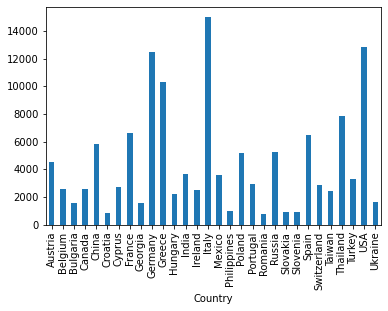

In [47]:
Country_group = LP_destinations.groupby('Country')
Country_group['num_of_words'].sum().plot(kind='bar')

# 9

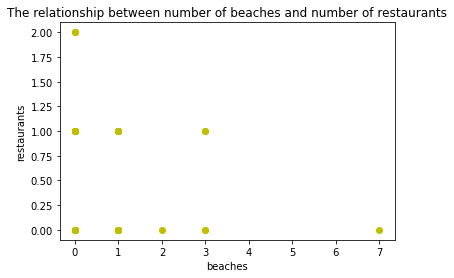

In [48]:
beaches  = LP_destinations['has_beaches']
restaurants = LP_destinations['has_restaurants']

plt.plot(beaches, restaurants,'o',c='y')

plt.xlabel("beaches")
plt.ylabel("restaurants")
plt.title("The relationship between number of beaches and number of restaurants")

plt.show()

# 10

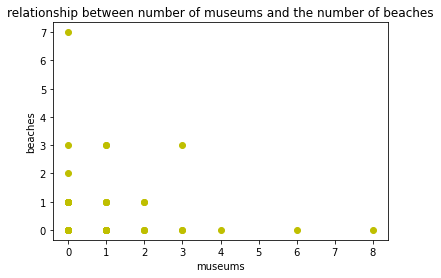

In [49]:
beaches  = LP_destinations['has_beaches']
museums = LP_destinations['has_museums']

plt.plot(museums, beaches,'o',c='y')

plt.xlabel("museums")
plt.ylabel("beaches")
plt.title("relationship between number of museums and the number of beaches")

plt.show()